# Google Cloud Vision API - Use Case for Detecting Text within an Image

In [ ]:
# Import all the important libraries for this project

In [1]:
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import io
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from google.cloud import vision
from google.cloud.vision import AnnotateFileRequest
from google.protobuf.json_format import MessageToDict

In [3]:
# Import GCP credentials from JSON document downloaded

In [5]:
#Please provide the path where your JSON document is located /drive
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="GCP - Vision API JSON.json"

In [ ]:
# Import the image from which you want to extract text

In [6]:
import io

path = 'Pulp Fiction Movie Poster.jpg' #Input image path here
with io.open(path, 'rb') as image_file:
        content = image_file.read()

# Pulp Fiction is one of my favourite movies and Uma Thurman one of my favourite actresses

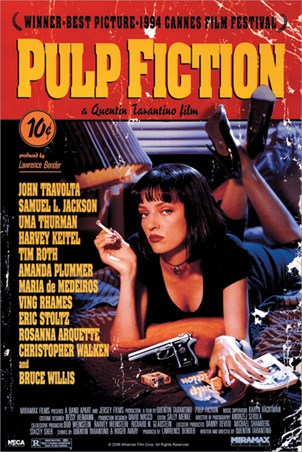

In [7]:
Image(path)

# Objective:
# 1. Identify all text information in the poster
# 2. Highlight the name 'UMA' with a bounded box

In [9]:
# Map Vision API

In [10]:
image = vision.Image(content=content)

In [11]:
client = vision.ImageAnnotatorClient()

In [12]:
# Call Vision API

In [13]:
response = client.text_detection(image=image)
texts = response.text_annotations
serializable_tags = [MessageToDict(tag._pb) for tag in texts]

# Output 1 - An extract of all the text within the image

In [15]:
print(serializable_tags[0]["description"])

(WINNER-BEST PICTURE-1994 CANNES FILM FESTIVAL
PULP FICTION
a Quentin Tanantino film
10
Lawence Bender
JOHN TRAVOLTA
SAMUEL L. JACKSON
UMA THURMAN
HARVEY KEITEL
TIM ROTH
AMANDA PLUMMER
MARIA de MEDEIROS
VING RHAMES
ERIC STOLTZ
ROSANNA ARQUETTE
CHRISTOPHER WALKEN
and
BRUCE WILLIS
wo
uh lorida-
E ANY ENCE OANI RAE AN E MOA A
DENN AMANT
SAOY
MECA R
MIRAMAX



In [18]:
# Next step to build the bounded box around the word 'UMA'

In [20]:
def gen_cord(serializable_tags):
  cord_df = pd.DataFrame(serializable_tags['boundingPoly']['vertices'])
  x_min, y_min = np.min(cord_df["x"]), np.min(cord_df["y"])
  x_max, y_max = np.max(cord_df["x"]), np.max(cord_df["y"])
  return serializable_tags["description"], x_max, x_min, y_max, y_min

# Output 2 - Highligh the name 'UMA'

In [ ]:
# 'UMA' is the 20th word in the image

Text Detected = UMA


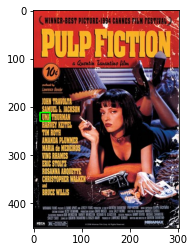

In [21]:
text, x_max, x_min, y_max, y_min = gen_cord(serializable_tags[20]) #Change variable here for word extract required
image = cv2.imread(path)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,255, 0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print ("Text Detected = {}".format(text))

# Thank You!